In [35]:
import mir_eval
import pandas as pd
import os
import csv
import json
import glob
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
cd ../deepsalience/

/scratch/rmb456/multif0/deepsalience


In [3]:
import core

Using TensorFlow backend.


In [43]:
with open(core.data_splits_path(), 'r') as fhandle:
    data_splits = json.load(fhandle)

xy_json_path = "/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs"
training_json_path = "/scratch/rmb456/multif0_ismir2017/multitask_data/"
mdb_audio_path = "/scratch/rmb456/MedleyDB_new/Audio/"
validation_trackids = data_splits['validate']

validation_data_path = "/scratch/rmb456/multif0_ismir2017/multitask_test_data/validation_data/"
valid_mf0_path = os.path.join(validation_data_path, 'multif0')
valid_mel_path = os.path.join(validation_data_path, 'melody')
valid_bas_path = os.path.join(validation_data_path, 'bass')
valid_voc_path = os.path.join(validation_data_path, 'vocal')

for trackid in validation_trackids:
    print(trackid)

    xy_json = os.path.join(xy_json_path, "{}_XY_pairs.json".format(trackid))
    training_json = os.path.join(training_json_path, "{}_training_pairs.json".format(trackid))
    with open(training_json, 'r') as fhandle:
        training_json = json.load(fhandle)
    
    npy_path_multif0 = os.path.join(xy_json_path, "{}_MIX_complete_nosynth_input.npy".format(trackid))

    training_key = os.path.join(training_json_path, "{}_MIX_complete_nosynth.wav".format(trackid))
    if training_key in training_json.keys():
        txt_path_multif0 = training_json[training_key]['multif0']
    else:
        txt_path_multif0 = None

    npy_path_singlef0 = os.path.join(xy_json_path, "{}_MIX_input.npy".format(trackid))
    training_key = os.path.join(mdb_audio_path, trackid, "{}_MIX.wav".format(trackid))

    if training_key in training_json.keys():
        training_dict = training_json[training_key]
        if 'melody' in training_dict.keys():
            txt_path_melody = training_dict['melody']
        else:
            txt_path_melody = None
            
        if 'bass' in training_dict.keys():
            txt_path_bass = training_dict['bass']
        else:
            txt_path_bass = None

        if 'vocal' in training_dict.keys():
            txt_path_vocal = training_dict['vocal']
        else:
            txt_path_vocal = None

    if os.path.exists(npy_path_multif0) and txt_path_multif0 is not None and os.path.exists(txt_path_multif0):
        print("multif0")
        shutil.copy(npy_path_multif0, valid_mf0_path)
        shutil.copy(txt_path_multif0, valid_mf0_path)

    if os.path.exists(npy_path_singlef0):
        if txt_path_melody is not None and os.path.exists(txt_path_melody):
            print("melody")
            shutil.copy(npy_path_singlef0, valid_mel_path)
            shutil.copy(txt_path_melody, valid_mel_path)
        
        if txt_path_bass is not None and os.path.exists(txt_path_bass):
            print("bass")
            shutil.copy(npy_path_singlef0, valid_bas_path)
            shutil.copy(txt_path_bass, valid_bas_path)
            
        if txt_path_vocal is not None and os.path.exists(txt_path_vocal):
            print("vocal")
            shutil.copy(npy_path_singlef0, valid_voc_path)
            shutil.copy(txt_path_vocal, valid_voc_path)

    print("")

BrandonWebster_DontHearAThing
melody

BrandonWebster_YesSirICanFly
multif0
melody
vocal

HezekiahJones_BorrowedHeart
multif0
melody
bass

MusicDelta_BebopJazz
multif0
melody
bass

MusicDelta_GriegTrolltog
multif0
melody
bass

MusicDelta_LatinJazz
multif0
melody
bass

MusicDelta_ModalJazz
multif0
melody
bass

SecretMountains_HighHorse
multif0
melody
bass

SweetLights_YouLetMeDown
multif0
melody
bass

Plasma_GoodShout
multif0
bass

TrevorAndTheSoundwaves_AloneAndSad
multif0
bass
vocal

BillyIdol_WhiteWedding
multif0
bass

Blink182_AllTheSmallThings
multif0
bass

BradPaisley_MudOnTheTires
multif0
melody
bass
vocal

CarlDouglas_KungFuFighting
multif0
bass

Chromeo_Tenderoni
multif0

FleetwoodMac_Rhiannon
multif0
bass

KtTunstall_BlackHorseAndTheCherryTree
multif0
bass

KtTunstall_SuddenlyISee
multif0
melody
bass
vocal

LaRoux_Bulletproof
multif0
melody

Live_IAlone
multif0
bass

LynyrdSkynyrd_FreeBird
multif0
bass
vocal

TalkingHeads_PsychoKiller
multif0
melody
bass
vocal

TaylorSwift_Love

In [45]:
validation_txt_files = glob.glob(os.path.join(valid_mf0_path, '*.txt'))
print(validation_txt_files)

['/scratch/rmb456/multif0_ismir2017/multitask_test_data/validation_data/multif0/KtTunstall_BlackHorseAndTheCherryTree_multif0_nosynth_annotation.txt', '/scratch/rmb456/multif0_ismir2017/multitask_test_data/validation_data/multif0/TalkingHeads_PsychoKiller_multif0_nosynth_annotation.txt', '/scratch/rmb456/multif0_ismir2017/multitask_test_data/validation_data/multif0/MusicDelta_ModalJazz_multif0_nosynth_annotation.txt', '/scratch/rmb456/multif0_ismir2017/multitask_test_data/validation_data/multif0/BrandonWebster_YesSirICanFly_multif0_nosynth_annotation.txt', '/scratch/rmb456/multif0_ismir2017/multitask_test_data/validation_data/multif0/MusicDelta_BebopJazz_multif0_nosynth_annotation.txt', '/scratch/rmb456/multif0_ismir2017/multitask_test_data/validation_data/multif0/Blink182_AllTheSmallThings_multif0_nosynth_annotation.txt', '/scratch/rmb456/multif0_ismir2017/multitask_test_data/validation_data/multif0/MusicDelta_GriegTrolltog_multif0_nosynth_annotation.txt', '/scratch/rmb456/multif0_ism

In [57]:
t, f = mir_eval.io.load_ragged_time_series(validation_txt_files[0])

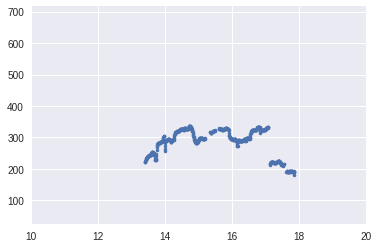

In [88]:
# plt.figure(figsize=(15, 7))
plt.plot(t, f, '.')
plt.xlim(10, 20)
plt.show()

In [65]:
256./44100.

0.005804988662131519

In [78]:
def time_freq_to_ragged_time_series(times, freqs):
    max_time = np.max(times)
    t_uniform = np.arange(0, max_time, 256./44100.)
    time_idx = np.digitize(times, t_uniform) - 1
    idx = time_idx < len(t_uniform)
    time_idx = time_idx[idx]
    
    freq_list = [[] for _ in t_uniform]
    for i, f in zip(time_idx, freqs):
        freq_list[i].append(f)
    
    freq_arrays = [np.array(lst) for lst in freq_list]
    return t_uniform, freq_arrays

In [79]:
t_test, f_test = time_freq_to_ragged_time_series(t, f)

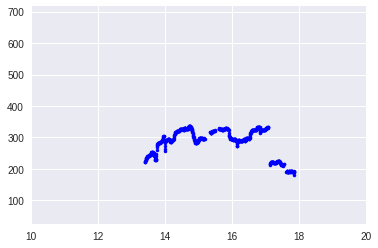

In [87]:
for tm, farr in zip(t_test, f_test):
    for fm in farr:
        plt.plot(tm, fm, '.b')
plt.xlim(10, 20)
plt.show()

In [84]:
zip(t_test, f_test)

[(0.0, array([], dtype=float64)),
 (0.0058049886621315194, array([], dtype=float64)),
 (0.011609977324263039, array([], dtype=float64)),
 (0.017414965986394557, array([], dtype=float64)),
 (0.023219954648526078, array([], dtype=float64)),
 (0.029024943310657598, array([], dtype=float64)),
 (0.034829931972789115, array([], dtype=float64)),
 (0.040634920634920635, array([], dtype=float64)),
 (0.046439909297052155, array([], dtype=float64)),
 (0.052244897959183675, array([], dtype=float64)),
 (0.058049886621315196, array([], dtype=float64)),
 (0.063854875283446716, array([], dtype=float64)),
 (0.069659863945578229, array([], dtype=float64)),
 (0.075464852607709756, array([], dtype=float64)),
 (0.08126984126984127, array([], dtype=float64)),
 (0.087074829931972797, array([], dtype=float64)),
 (0.09287981859410431, array([], dtype=float64)),
 (0.098684807256235824, array([], dtype=float64)),
 (0.10448979591836735, array([], dtype=float64)),
 (0.11029478458049886, array([], dtype=float64)),


In [85]:
t

array([  52.30294785,   52.30875283,   52.31455782, ...,  143.82439909,
        143.83020408,  143.83600907])